# Build A Logistic Regression model with output y, to check whether the client has subscribed a term deposit or not Binomial ("yes" or "no")


### Import Libraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Import Dataset and Perform EDA

In [42]:
bk = pd.read_csv("bank-full.csv",sep=';')

In [43]:
bk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [44]:
bk.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [45]:
bk.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
le= LabelEncoder()

In [47]:
bk= bk.apply(le.fit_transform)

In [48]:
bk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


<AxesSubplot:>

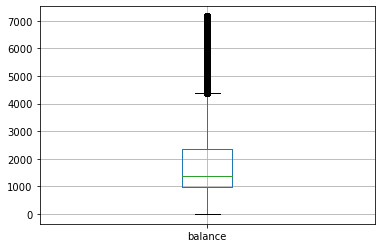

In [49]:
bk.boxplot(column='balance')

<AxesSubplot:>

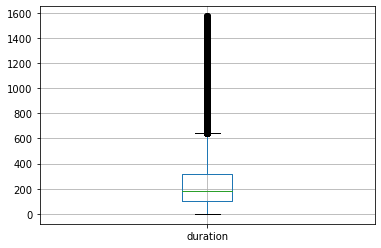

In [50]:
bk.boxplot(column='duration')

In [51]:
bk.duplicated().any()

False

<AxesSubplot:>

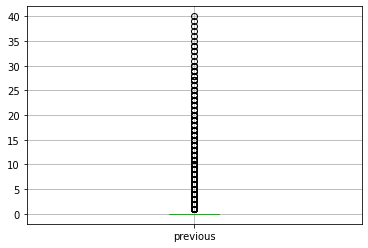

In [52]:
bk.boxplot(column='previous')

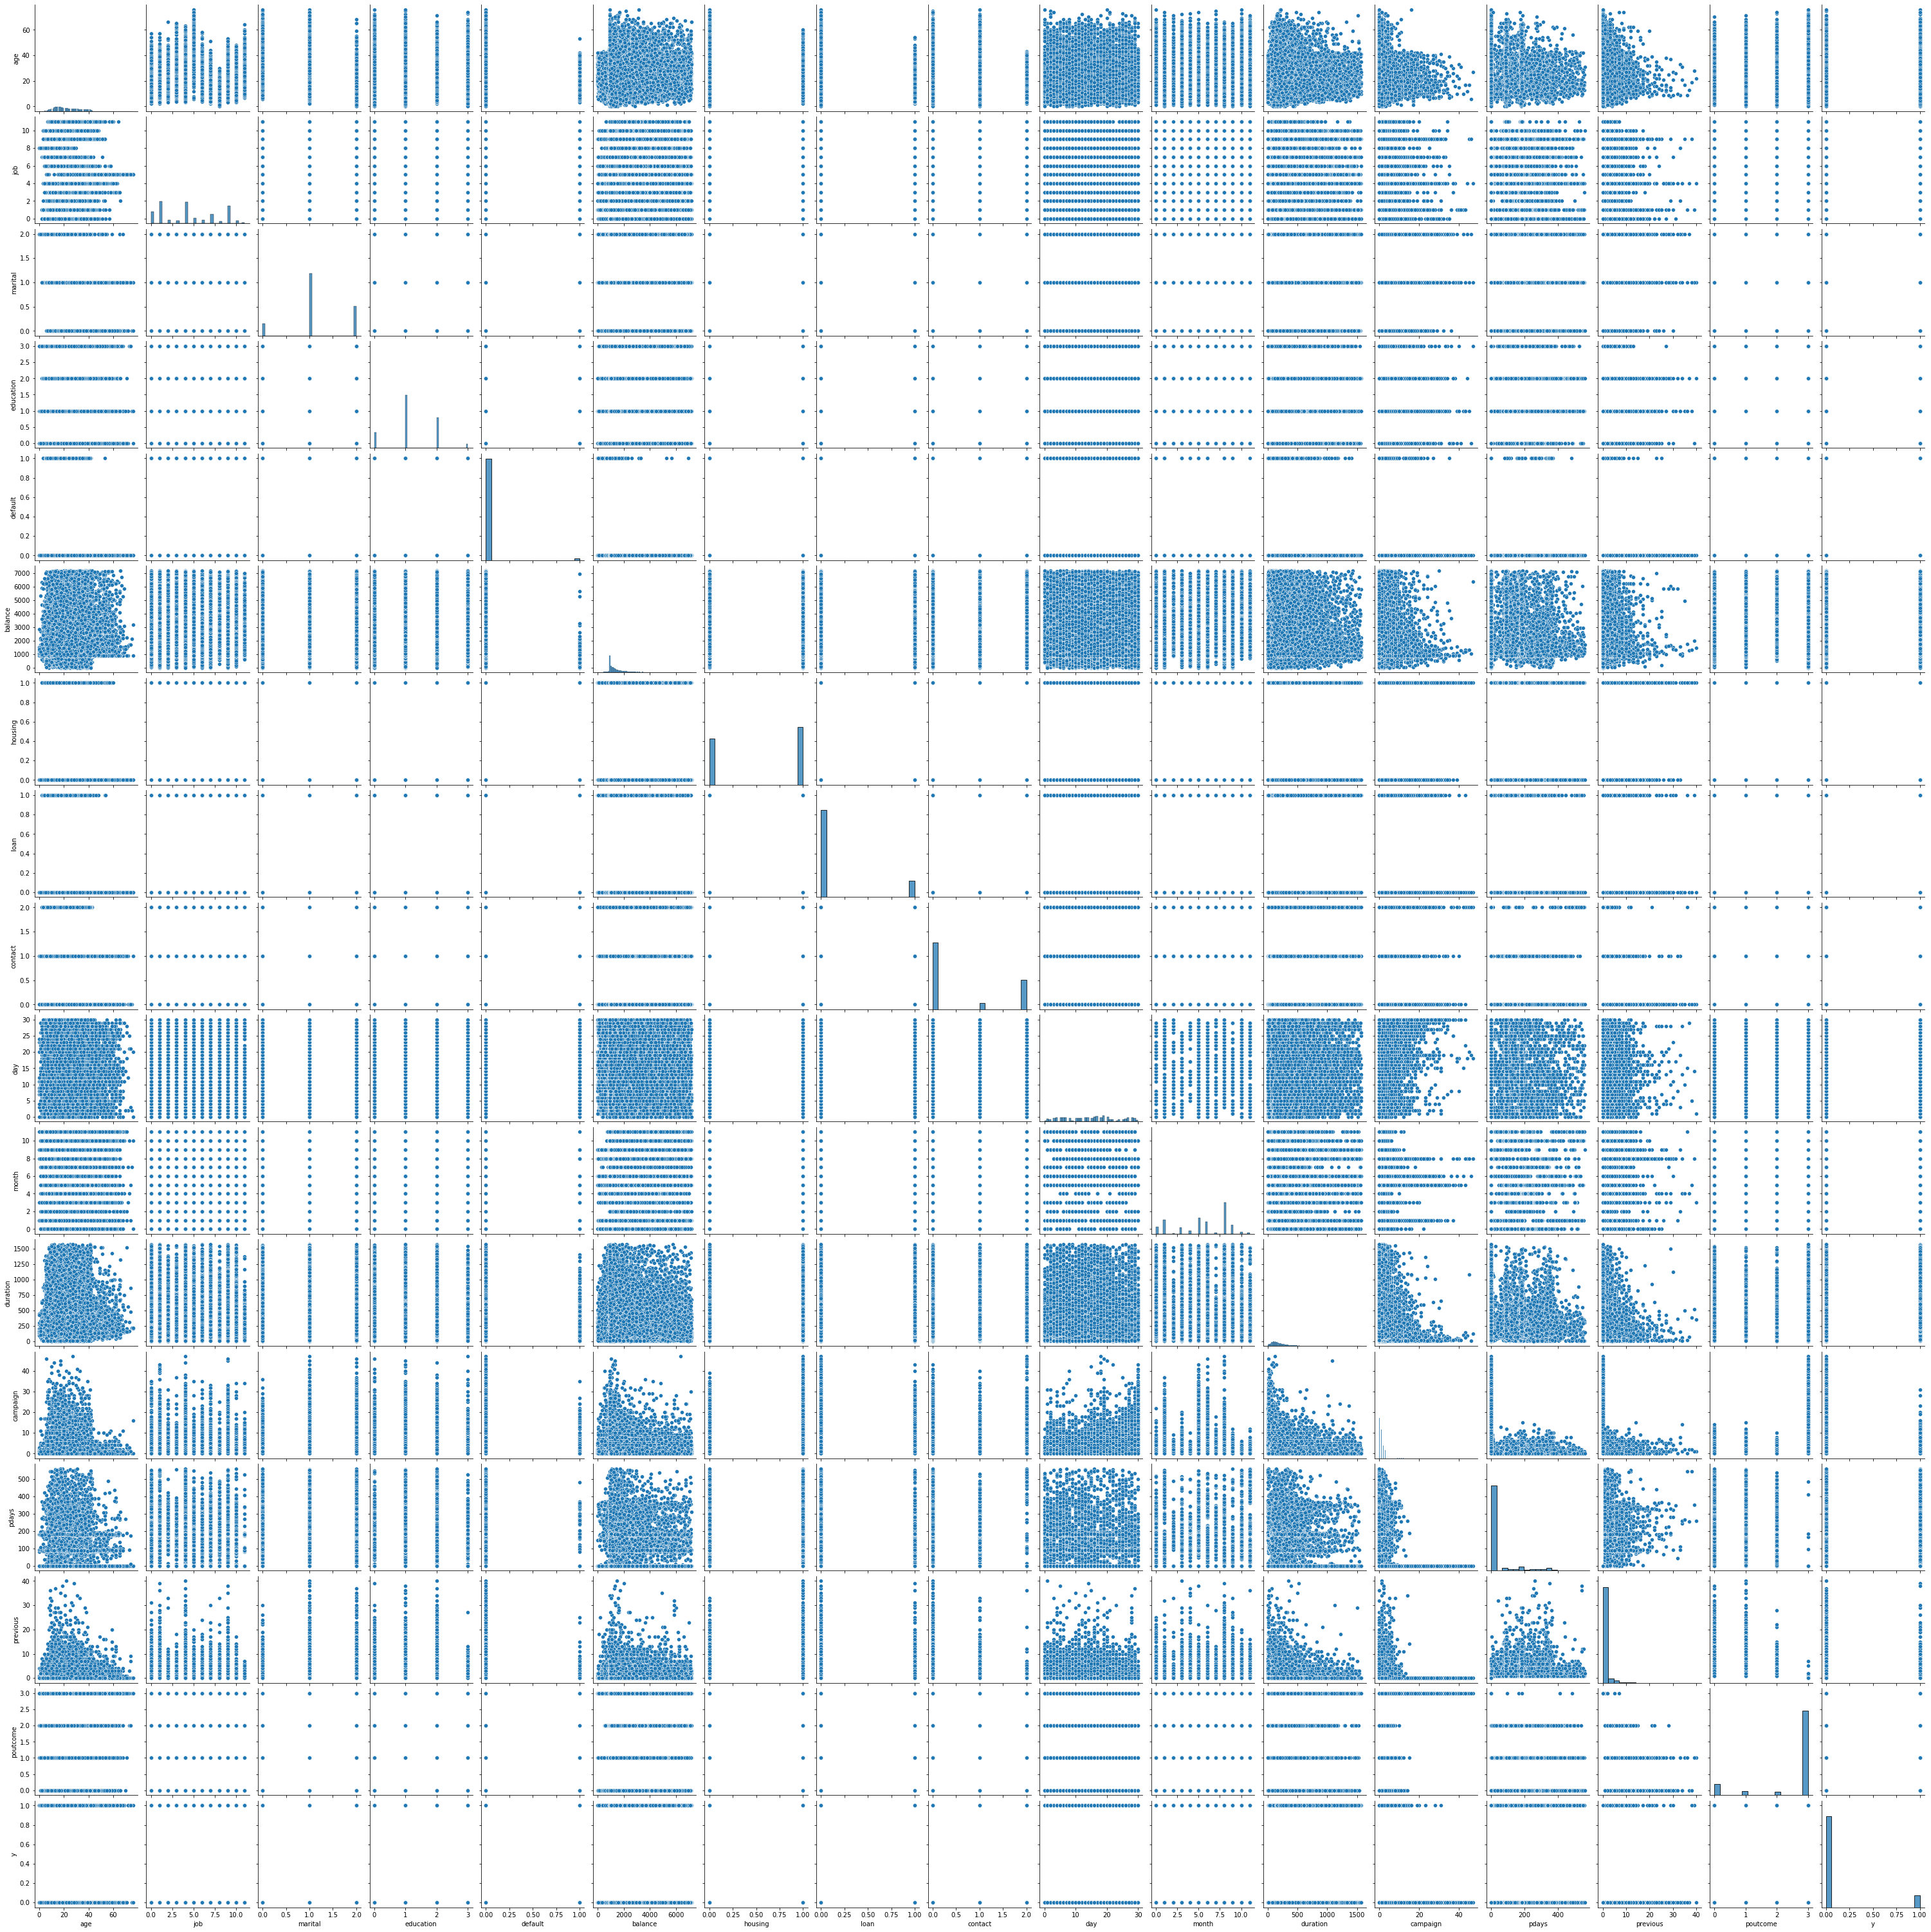

In [53]:
sns.pairplot(bk)

<AxesSubplot:>

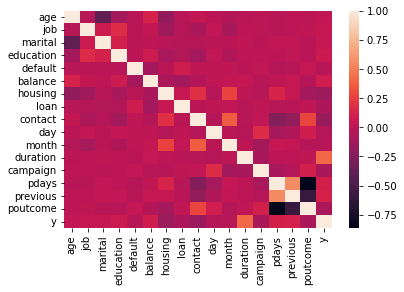

In [54]:
sns.heatmap(bk.corr())

## Build a Logistic Regression Model

In [55]:
features = bk.drop('y',axis=1)

In [56]:
target = bk['y']

In [57]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=.25,random_state=93)

In [58]:
lr=LogisticRegression(max_iter=46000)

In [59]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=46000)

In [60]:
y_pred = lr.predict(x_test)

In [61]:
lr.predict_proba(x_test)

array([[0.93741747, 0.06258253],
       [0.92845425, 0.07154575],
       [0.9900986 , 0.0099014 ],
       ...,
       [0.96361432, 0.03638568],
       [0.98976776, 0.01023224],
       [0.83036814, 0.16963186]])

In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
accuracy_score(y_test,y_pred)

0.8856940635229585

In [64]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[9695  229]
 [1063  316]]


<AxesSubplot:>

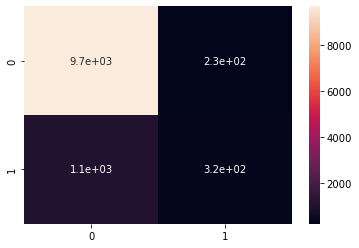

In [65]:
sns.heatmap(confusion_matrix,annot=True)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9924
           1       0.58      0.23      0.33      1379

    accuracy                           0.89     11303
   macro avg       0.74      0.60      0.63     11303
weighted avg       0.86      0.89      0.86     11303



### The Logistic Regression model predicts the value with 89% accuracy.

### Check ROC curve and AUC score

In [67]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
y_pred_proba

array([0.06258253, 0.07154575, 0.0099014 , ..., 0.03638568, 0.01023224,
       0.16963186])

In [68]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

In [69]:
auc = roc_auc_score(y_test, y_pred_proba)
auc 

0.8685535815489965

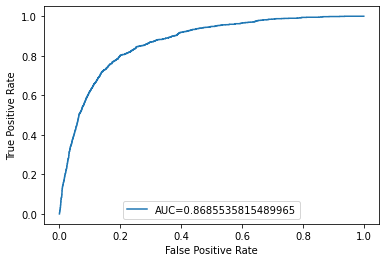

In [70]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=8)

### As we observe the ROC curve and the area under the curve using AUC score we can say that as AUC score = 0.86 which is close to 1, the model does a good job of classifying data.